# [2018 KAKAO BLIND RECRUITMENT] 

# [1차] 추석 트래픽

이번 추석에도 시스템 장애가 없는 명절을 보내고 싶은 어피치는 서버를 증설해야 할지 고민이다. 장애 대비용 서버 증설 여부를 결정하기 위해 작년 추석 기간인 9월 15일 로그 데이터를 분석한 후 초당 최대 처리량을 계산해보기로 했다. 초당 최대 처리량은 요청의 응답 완료 여부에 관계없이 임의 시간부터 1초(=1,000밀리초)간 처리하는 요청의 최대 개수를 의미한다.

<입력 형식>
- solution 함수에 전달되는 lines 배열은 N(1 ≦ N ≦ 2,000)개의 로그 문자열로 되어 있으며, 각 로그 문자열마다 요청에 대한 응답완료시간 S와 처리시간 T가 공백으로 구분되어 있다.
- 응답완료시간 S는 작년 추석인 2016년 9월 15일만 포함하여 고정 길이 2016-09-15 hh:mm:ss.sss 형식으로 되어 있다.
- 처리시간 T는 0.1s, 0.312s, 2s 와 같이 최대 소수점 셋째 자리까지 기록하며 뒤에는 초 단위를 의미하는 s로 끝난다.
- 예를 들어, 로그 문자열 2016-09-15 03:10:33.020 0.011s은 "2016년 9월 15일 오전 3시 10분 33.010초"부터 "2016년 9월 15일 오전 3시 10분 33.020초"까지 "0.011초" 동안 처리된 요청을 의미한다. (처리시간은 시작시간과 끝시간을 포함)
- 서버에는 타임아웃이 3초로 적용되어 있기 때문에 처리시간은 0.001 ≦ T ≦ 3.000이다.
- lines 배열은 응답완료시간 S를 기준으로 오름차순 정렬되어 있다.

<출력 형식>
- solution 함수에서는 로그 데이터 lines 배열에 대해 초당 최대 처리량을 리턴한다.

<예제>

    입력: [
    "2016-09-15 20:59:57.421 0.351s",
    "2016-09-15 20:59:58.233 1.181s",
    "2016-09-15 20:59:58.299 0.8s",
    "2016-09-15 20:59:58.688 1.041s",
    "2016-09-15 20:59:59.591 1.412s",
    "2016-09-15 21:00:00.464 1.466s",
    "2016-09-15 21:00:00.741 1.581s",
    "2016-09-15 21:00:00.748 2.31s",
    "2016-09-15 21:00:00.966 0.381s",
    "2016-09-15 21:00:02.066 2.62s"
    ]

    출력: 7

설명: 아래 타임라인 그림에서 빨간색으로 표시된 1초 각 구간의 처리량을 구해보면 (1)은 4개, (2)는 7개, (3)는 2개임을 알 수 있다. 따라서 초당 최대 처리량은 7이 되며, 동일한 최대 처리량을 갖는 1초 구간은 여러 개 존재할 수 있으므로 이 문제에서는 구간이 아닌 개수만 출력한다.

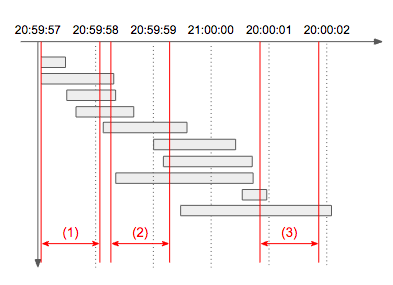

[TIP]

- 시간 : millisecond 단위로 변환

- 처리 시간은 시작 시간과 끝 시간을 포함하므로 
        
        응답 시작 시간 = 응답 완료 시간 - 처리 시간 + 1
        
- 유효 범위 : 응답 완료 시간 - 응답 시간 + 1000(=1sec) 
        
        유효 범위 내 처리되는 작업일 경우 count++
        
   
- 유효 범위 내에 처리되는 작업이란?
        
    1. 현재 응답 완료 시간이 유효 범위 내에 있는 경우

    2. 현재 처리가 유효 범위를 포함하는 경우 

    3. 현재 응답 시작 시간이 유효 범위 내에 있는 경우 


Solution

In [56]:
def getMillisec(time):
    
    h, m, s = time.split(":")
    h = int(h) * 60 * 60 * 1000
    m = int(m) * 60 * 1000
    s = float(s) * 1000
    
    return h+m+s

def solution(lines):
    
    answer = 0
    records = []

    for l in lines:
        
        date, eTime, pTime = l.split(" ")
        pTime = float(pTime.rstrip("s")) * 1000
        end = getMillisec(eTime)
        
        # 유의 : 처리 시간은 시작 시간과 끝 시간을 포함
        start = end - pTime + 1        
        
        records.append([start, end])
        
        
    for start, end in records:
        
        cnt = 0    
        for s, e in records:
            # 조건 1 : 현재 응답 완료 시간이 유효 범위 내에 있는 경우
            if e >= end and e < end + 1000:
                cnt += 1 
                
            # 조건 2 : 현재 처리가 유효 범위를 포함하는 경우
            elif s <= end and e >= end + 1000 :
                cnt += 1
                
            # 조건 3 : 현재 응답 시작 시간이 유효 범위 내에 있는 경우
            elif s >= end and s < end + 1000:
                cnt += 1 
                
        answer = max(answer, cnt)

    return answer

In [52]:
solution(	["2016-09-15 01:00:04.002 2.0s", "2016-09-15 01:00:07.000 2s"])

3